<a href="https://colab.research.google.com/github/WillianMachado95/Analise_Estatistica/blob/main/AnaliseEstat_NUMPY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# <font color='blue'>Análise Estatística de Dados com NumPy Para a Área de Marketing</font>

## 1. Definição do Problema de Negócio

### 1.1. Contexto

Uma plataforma de e-commerce coleta um volume significativo de dados sobre a interação dos usuários com o site, incluindo o número de visitas, a duração da sessão, a atividade de adição de produtos ao carrinho e os valores de compra finalizados. No entanto, esses dados estão sendo subutilizados. Atualmente, as decisões sobre campanhas de marketing, promoções e melhorias na experiência do usuário (UX) são tomadas com base em intuição e métricas de alto nível, sem uma compreensão aprofundada dos padrões de comportamento que impulsionam os resultados.

### 1.2. Problema de Negócio

A empresa enfrenta o desafio de compreender profundamente os padrões de comportamento que diferenciam os clientes de alto valor dos visitantes que abandonam o site sem comprar. Essa falta de clareza resulta em:

- Marketing Genérico: Nossas campanhas de marketing são de "tamanho único", resultando em baixo engajamento e desperdício de orçamento, pois não conseguimos personalizar as ofertas para os segmentos de clientes corretos.

- Perda de Oportunidades: Não conseguimos identificar e engajar proativamente os clientes com maior potencial de compra ou criar estratégias para converter os visitantes que demonstram interesse, mas não finalizam a compra.

- Decisões Não Embasadas: As estratégias de produto e de experiência do usuário carecem de uma base quantitativa sólida sobre quais comportamentos (ex: tempo no site, frequência de visitas) estão mais fortemente correlacionados com o sucesso das vendas.

### 1.3. Objetivo Principal

Utilizar a análise estatística dos dados de navegação e compra para segmentar clientes, identificar os principais indicadores de comportamento que levam à conversão e fornecer insights acionáveis para as equipes de marketing e produto, a fim de aumentar o ticket médio e a taxa de conversão geral da plataforma.

### 1.4. Perguntas-Chave a Serem Respondidas

A análise de dados deve responder às seguintes perguntas críticas de negócio:

- 1- Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?

- 2- Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

- 3- Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

- 4- Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

### 1.5. Resultado Esperado e Impacto no Negócio

O resultado deste projeto será um relatório de análise estatística que permitirá:

- Segmentação Aprimorada: Criação de pelo menos dois segmentos de clientes (ex: "Clientes de Alto Valor" e "Visitantes Engajados sem Compra") para direcionamento de campanhas de marketing personalizadas.

- Otimização de Marketing: Direcionar o orçamento de marketing para ações focadas nos comportamentos que mais se correlacionam com compras de alto valor, aumentando o Retorno Sobre o Investimento (ROI).

- Melhoria da Experiência do Usuário (UX): Fornecer à equipe de produto dados que possam justificar testes A/B ou melhorias em áreas do site frequentadas por usuários que não convertem.

In [ ]:
# Importar

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# semente

np.random.seed(42)

In [ ]:
# usuários

num_usuarios = 500

In [ ]:
# n visitas

visitas = np.random.randint(1,51, size = num_usuarios)

In [ ]:
# tempo de visita

tempo_no_site = np.random.normal(loc = 20, scale = 5, size = num_usuarios) + (visitas * 0.5)
tempo_no_site = np.round(tempo_no_site,2)

In [ ]:
# quantidade de intens carrinho

itens_no_carrinho = np.random.randint(0,8, size = num_usuarios) + (visitas // 10)

In [ ]:
itens_no_carrinho = (itens_no_carrinho + (tempo_no_site // 15)).astype(int)

In [ ]:
#valor compra

valor_compra = (itens_no_carrinho * 35) + np.random.normal(loc = 0, scale = 10, size = num_usuarios)

In [ ]:
type(valor_compra)

numpy.ndarray

In [ ]:
valor_compra[itens_no_carrinho == 0] = 0
valor_compra[valor_compra < 0] = 0
valor_compra = np.round(valor_compra, 2)

In [ ]:
dados_ecommerce = np.column_stack((visitas, tempo_no_site, itens_no_carrinho, valor_compra))

In [ ]:
print(dados_ecommerce)

[[ 39.    23.29   9.   314.54]
 [ 29.    29.38   5.   177.43]
 [ 15.    26.24   6.   207.59]
 ...
 [ 16.    31.5    5.   168.49]
 [ 26.    30.12   4.   134.71]
 [ 26.    33.61   8.   285.86]]


# Análise Estatística Descritiva

- 1- Qual é o perfil médio do nosso usuário em termos de visitas, tempo de navegação e valor de compra (ticket médio)?


In [ ]:
visitas_col = dados_ecommerce[:,0]
tempo_col = dados_ecommerce[:,1]
itens_col = dados_ecommerce[:,2]
valor_col = dados_ecommerce[:,3]


print("----- ANÁLISE ESTATÍSTICA GERAL ----")

#Média

media_visitas = np.mean(visitas_col)
media_tempo = np.mean(tempo_col)
media_itens = np.mean(itens_col)
media_valor = np.mean(valor_col)

#Mediana(menos sensível a valores extremos)
mediana_valor = np.median(valor_col)

#Desvio padrão
Desvio_valor = np.std(valor_col)

#vALORES MÁXIMO E MÍNIMO
max_valor = np.max(valor_col)
min_valor = np.min(valor_col[valor_col > 0])

print(f"\n Média de Visitas: {media_visitas:.2f}")
print(f"\n Média de Tempo: {media_tempo:.2f} min")
print(f"\n Média de Itens no Carrinho: {media_itens:.2f}")
print(f"\n Média de Valor de Compra (Ticket Médio): R${media_valor:.2f}")

print(f"\n Mediana do valor de compra: R$ {mediana_valor}")

print(f"\n O desvio padrão do valor de compra é: R${Desvio_valor:.2f}")

print(f"\n O maior valor é: R$ {max_valor}")
print(f"\n O menor valor é: R$ {min_valor}")

----- ANÁLISE ESTATÍSTICA GERAL ----

 Média de Visitas: 25.86

 Média de Tempo: 32.78 min

 Média de Itens no Carrinho: 7.20

 Média de Valor de Compra (Ticket Médio): R$252.70

 Mediana do valor de compra: R$ 248.135

 O desvio padrão do valor de compra é: R$106.94

 O maior valor é: R$ 530.37

 O menor valor é: R$ 23.42


#Gráfico



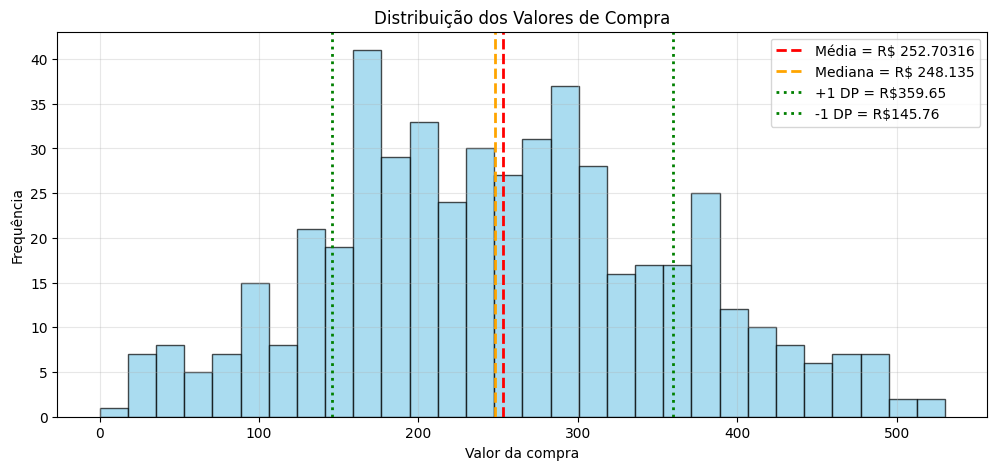

In [ ]:
plt.figure(figsize= (12,5))
plt.hist(valor_col,bins = 30, color = 'skyblue', edgecolor = 'black', alpha = 0.7)
plt.axvline(media_valor, color = 'red', linestyle = '--', linewidth = 2, label = f'Média = R$ {media_valor}')
plt.axvline(mediana_valor, color = "orange",linestyle = '--', linewidth = 2, label = f'Mediana = R$ {mediana_valor}' )
plt.axvline(media_valor + Desvio_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'+1 DP = R${media_valor + Desvio_valor:.2f}')
plt.axvline(media_valor - Desvio_valor, color = 'green', linestyle = ':', linewidth = 2, label = f'-1 DP = R${media_valor - Desvio_valor:.2f}')
plt.title("Distribuição dos Valores de Compra")
plt.xlabel ("Valor da compra")
plt.ylabel ("Frequência")
plt.legend()
plt.grid(alpha = 0.3)
#plt.gca().set_facecolor("green")
plt.show()

2- Quais são as características e comportamentos distintos dos nossos clientes de "Alto Valor"? Eles visitam mais o site? Passam mais tempo navegando?

>250


In [ ]:
clientes_alto_valor = dados_ecommerce[dados_ecommerce[:,3] > 250]

print("\n ---- ANÁLISE: CLIENTES DE ALTO VALOR ----")
print(f'Número de clientes de alto valor: {clientes_alto_valor.shape[0]}')

#Estatísticas gerais do grupo
media_visitas_alto_valor = np.mean(clientes_alto_valor[:,0])
media_tempo_alto_valor = np.mean(clientes_alto_valor[:,1])

print(f'Média e visitas desse grupo: {media_visitas_alto_valor:.2f}')
print(f'Média de tempo no site deste grupo: {media_tempo_alto_valor:.2f} min')


 ---- ANÁLISE: CLIENTES DE ALTO VALOR ----
Número de clientes de alto valor: 245
Média e visitas desse grupo: 33.29
Média de tempo no site deste grupo: 37.11 min


3- Qual é o comportamento dos usuários que visitam o site, mas não realizam nenhuma compra? Onde está a oportunidade de conversão com este grupo?

In [ ]:
visitantes_sem_compra = dados_ecommerce[dados_ecommerce[:,3] == 0]

print("\n --- ANÁLISE: VISITANTES SEM COMPRA ---")
print(f"Número de visitantes sem compra: {visitantes_sem_compra.shape[0]}")

# Estatísticas desse grupo
media_tempo_sem_compra =  np.mean(visitantes_sem_compra[:,1])
media_visitas_sem_compra = np.mean(visitantes_sem_compra[:,0])

print(f'Média e visitas desse grupo: {media_visitas_sem_compra:.2f}')
print(f'Média de tempo no site deste grupo: {media_tempo_sem_compra:.2f} min no site')


 --- ANÁLISE: VISITANTES SEM COMPRA ---
Número de visitantes sem compra: 1
Média e visitas desse grupo: 7.00
Média de tempo no site deste grupo: 14.71 min no site


4- Existe uma correlação estatisticamente relevante entre o tempo gasto no site, o número de itens no carrinho e o valor final da compra?

In [ ]:
matriz_correlacao = np.corrcoef(dados_ecommerce, rowvar= False)

print("\n ---- MATRIZ DE CORRELÇÃO -----")
print(np.round(matriz_correlacao, 2))


 ---- MATRIZ DE CORRELÇÃO -----
[[1.   0.83 0.65 0.65]
 [0.83 1.   0.6  0.59]
 [0.65 0.6  1.   1.  ]
 [0.65 0.59 1.   1.  ]]


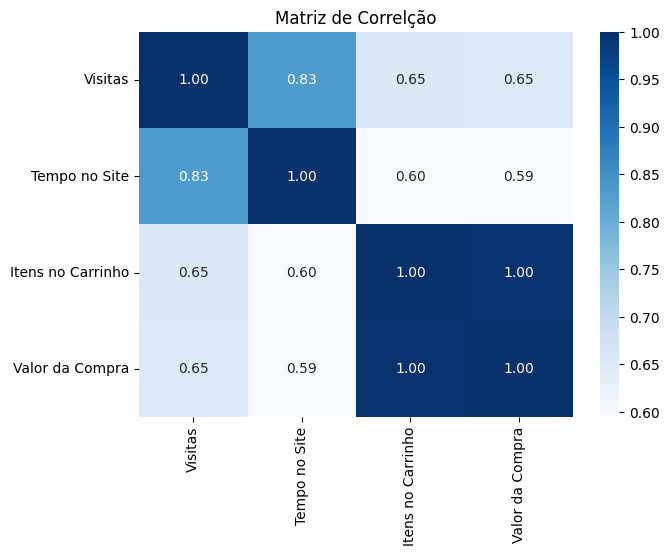

In [ ]:
nomes_variaveis = ["Visitas", "Tempo no Site", "Itens no Carrinho", "Valor da Compra"]

df_correlacao = pd.DataFrame(matriz_correlacao,
                             index = nomes_variaveis,
                             columns= nomes_variaveis)

# Matriz de correlação

plt.figure(figsize=(7,5))
sns.heatmap(df_correlacao, annot = True, cmap = "Blues", fmt = ".2f")
plt.title("Matriz de Correlção")
plt.show()


In [ ]:
print(df_correlacao)

                    Visitas  Tempo no Site  Itens no Carrinho  Valor da Compra
Visitas            1.000000       0.831550           0.652212         0.650696
Tempo no Site      0.831550       1.000000           0.596197         0.594764
Itens no Carrinho  0.652212       0.596197           1.000000         0.995665
Valor da Compra    0.650696       0.594764           0.995665         1.000000
